 ## Citibike Tripdata Exploration

This is a notebook about the results of citibike tripdata exploration.
We are looking at citibike trips in 2017. 
Here I will analyze the user types, and citibike tripdata trends I found.

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# read the csv file
df = pd.read_csv('./final_trip_data.csv')

In [19]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1           float64
tripduration             int64
starttime               object
stoptime                object
start station name      object
end station name        object
usertype                object
birth year             float64
gender                   int64
start_station_geoid    float64
end_station_geoid      float64
dtype: object

In [20]:
#transform to datetime object
df['starttime']=pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')

In [22]:
df['stoptime']=pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [23]:
df.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                  float64
tripduration                    int64
starttime              datetime64[ns]
stoptime               datetime64[ns]
start station name             object
end station name               object
usertype                       object
birth year                    float64
gender                          int64
start_station_geoid           float64
end_station_geoid             float64
dtype: object

In [ ]:
#drop columns where user's are subs

### Trips by time 

In [24]:
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')

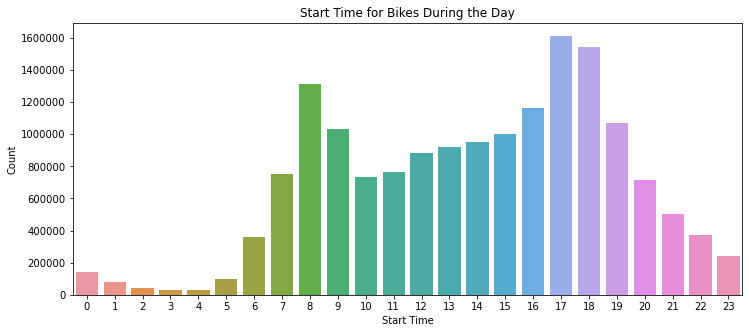

In [71]:
plt.figure(figsize=(12,5))
time= sns.countplot(data=df, x="start hour")
plt.ticklabel_format(style='plain', axis='y')
time.set(xlabel='Start Time', ylabel='Count',title="Start Time for Bikes During the Day")
plt.show()

From this graph we can see that people tend to ride bikes mostly at 8-9am, and 4-7pm usual times when people commute from and to work. This graph was made excluding the weekends. 

### Number of Trips Per Month

In [31]:
df['months']=df['starttime'].dt.month.astype('category')

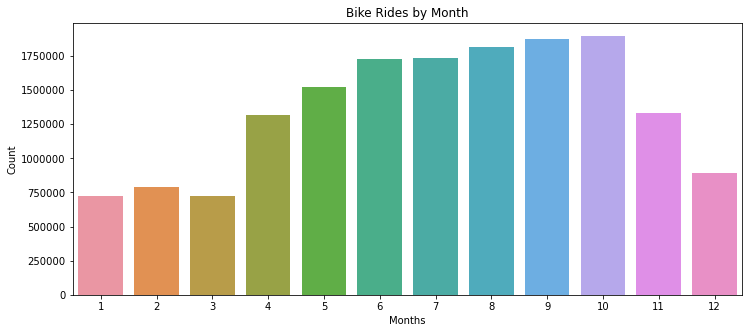

In [42]:

plt.figure(figsize=(12,5))
time= sns.countplot(data=df, x="months");
plt.ticklabel_format(style='plain', axis='y')
time.set(xlabel='Months', ylabel='Count',title="Bike Rides by Month")
plt.show()

From this we can see that in 2017, people ride bikes the most at times from April to October when the weather is warm

### Trip Duration Plot

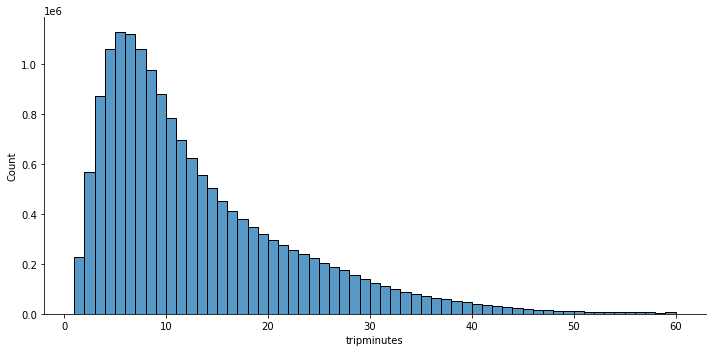

In [8]:
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);

For trip duration by minutes we get a right-skewed graph where most of the trip times don't exceed 20minutes. 
From this we can see that New York City bike-riders don't travel very far distances.